    在机器学习中，归一化（Normalization） 是一种常用的数据预处理技术，用于将特征向量缩放到统一的尺度。sklearn.preprocessing.normalize 函数提供了多种归一化方法，主要通过调整特征向量的范数（norm）来实现。

## 一、归一化的核心概念与作用
1. 目标：将每个样本（特征向量）缩放到单位范数（通常是 L1 或 L2 范数为 1）。
2. 与标准化（Standardization）的区别：
   * 标准化（如 StandardScaler）处理的是特征列，通过减去均值并除以标准差，使数据符合标准正态分布；
   * 归一化处理的是样本行，通过缩放向量长度，使每个样本的范数为 1。
3. 适用场景：
   * 当算法关注样本间的方向（如余弦相似度）而非绝对大小时；
   * 处理文本数据（如 TF-IDF 向量）或稀疏数据时；
   * 某些机器学习模型（如 KNN、SVM、神经网络）对特征尺度敏感时。

## 二、normalize 函数的关键参数

In [8]:
from sklearn.preprocessing import normalize
import numpy as np
X = np.array([
    [1, -2],   # 样本1
    [3, 4],    # 样本2
    [0, -5]    # 样本3
], dtype=np.float64)
X_normalized = normalize(
    X,                  # 输入数组（样本矩阵）
    norm='l2',          # 范数类型：'l1', 'l2', 'max'
    axis=1,             # 0=按列归一化，1=按行归一化（默认）
    copy=True,          # 是否复制数据（避免原地修改）
    return_norm=False   # 是否返回计算的范数
)
# norm 参数：
#    'l2'（默认）：欧几里得范数，向量各元素平方和的平方根；
#    'l1'：曼哈顿范数，向量各元素绝对值之和；
#    'max'：最大值范数，向量各元素绝对值的最大值。

## 三、归一化方法对比

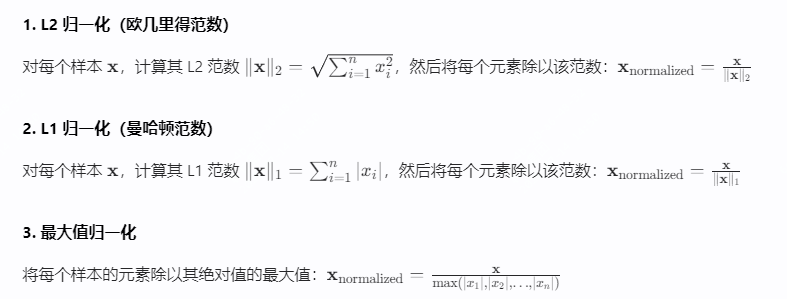

## 四、代码示例：三种归一化方法对比

In [9]:
import numpy as np
from sklearn.preprocessing import normalize

# 创建示例数据：3个样本，每个样本2个特征
X = np.array([
    [1, -2],   # 样本1
    [3, 4],    # 样本2
    [0, -5]    # 样本3
], dtype=np.float64)

# 打印原始数据
print("原始数据：")
print(X)

# 1. L2归一化
X_l2 = normalize(X, norm='l2', axis=1)
print("\nL2归一化后：")
print(X_l2)
# 验证每个样本的L2范数是否为1
print("L2范数验证：")
print(np.sqrt(np.sum(X_l2**2, axis=1)))  # 应输出 [1. 1. 1.]

# 2. L1归一化
X_l1 = normalize(X, norm='l1', axis=1)
print("\nL1归一化后：")
print(X_l1)
# 验证每个样本的L1范数是否为1
print("L1范数验证：")
print(np.sum(np.abs(X_l1), axis=1))  # 应输出 [1. 1. 1.]

# 3. 最大值归一化
X_max = normalize(X, norm='max', axis=1)
print("\n最大值归一化后：")
print(X_max)
# 验证每个样本的最大值是否为1（或-1）
print("最大值验证：")
print(np.max(np.abs(X_max), axis=1))  # 应输出 [1. 1. 1.]

原始数据：
[[ 1. -2.]
 [ 3.  4.]
 [ 0. -5.]]

L2归一化后：
[[ 0.4472136  -0.89442719]
 [ 0.6         0.8       ]
 [ 0.         -1.        ]]
L2范数验证：
[1. 1. 1.]

L1归一化后：
[[ 0.33333333 -0.66666667]
 [ 0.42857143  0.57142857]
 [ 0.         -1.        ]]
L1范数验证：
[1. 1. 1.]

最大值归一化后：
[[ 0.5  -1.  ]
 [ 0.75  1.  ]
 [ 0.   -1.  ]]
最大值验证：
[1. 1. 1.]


## 五、结果分析

## 六、应用场景选择
* L2 归一化：最常用，保留向量方向的同时消除尺度影响，适用于需要计算余弦相似度的场景（如文本分类、推荐系统）。
* L1 归一化：使向量元素之和为 1，常用于概率分布或特征重要性的场景（如主题模型中的文档 - 主题分布）。
* 最大值归一化：简单快速，将数据缩放到固定区间，适用于需要保留原始数据符号和相对比例的场景。

## 七、与 Normalizer 类的关系
    normalize 是函数接口，而 sklearn.preprocessing.Normalizer 是等价的类接口，用于集成到 Pipeline 中：

In [10]:
from sklearn.preprocessing import Normalizer

# 创建归一化器
normalizer = Normalizer(norm='l2')

# 拟合和转换数据
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)  # 使用训练集的归一化参数

NameError: name 'X_train' is not defined

注意：Normalizer 的 fit 方法不做任何计算（无状态），仅用于接口一致性。